<a href="https://www.kaggle.com/code/cameronhopkins/redzone-intelligence?scriptVersionId=216388621" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction: RedZone Intelligence
This notebook provides a comprehensive analysis of route distributions and probabilities in various receiver alignments, focusing on how frequently each route is run and targeted across all games. It delves into the strategic preferences for route selection, especially in critical game scenarios like Redzone plays. The analysis includes pie charts and bar charts to visualize the distribution of routes and their targeting probabilities, highlighting key routes such as "GO," "HITCH," "CROSS," and "OUT" that are central to offensive strategies.

Additionally, the notebook examines the defensive side by analyzing the coordinates and positions of players who were initial pass rushers and successfully caused pressure on the quarterback during Redzone plays in Week 9. This segment emphasizes the role of inside linebackers and the involvement of secondary players like cornerbacks and safeties in defensive blitz strategies.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


In [2]:
#load in datasets
PlayerPlay = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv')
Play=pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')
PlayerInfo= pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/players.csv')


# 3x0, 3x1, or 3x2 receiver alignment:

The pie chart below represents the distribution of routes run by wide receivers (WRs) across all games, with each route’s percentage indicating how often it is run. "GO" is the most commonly run route, accounting for 22.88% of all route runs, followed by "HITCH" at 15.29%. Routes like "IN" and "CROSS" are also frequently run, with percentages of 12.70% and 11.08%, respectively. On the other hand, "ANGLE" is run the least, making up only 0.12% of the routes. 

The bar chart below represents the probability of each route appearing across all games, which shows how often each route is targeted relative to other routes. The probabilities are lower than the distribution of routes run, with "GO" still leading at 5.68%, followed by "HITCH" at 4.98%. Routes like "IN" and "OUT" are targeted less frequently compared to their appearance in the route run data, with probabilities of 4.61% and 4.32%, respectively. Again, "ANGLE" appears as the least targeted route, with a probability of just 0.08%.

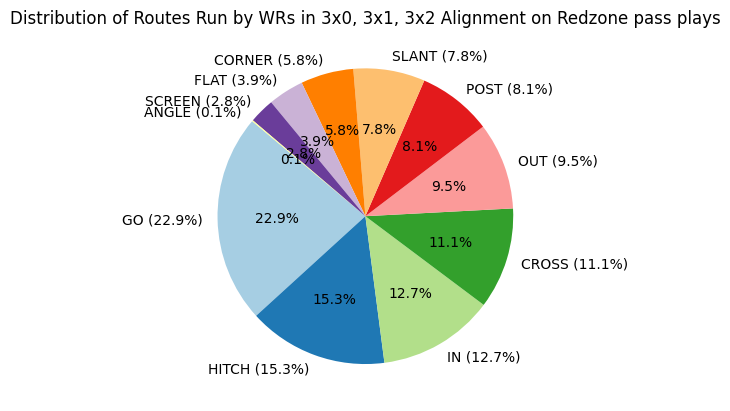

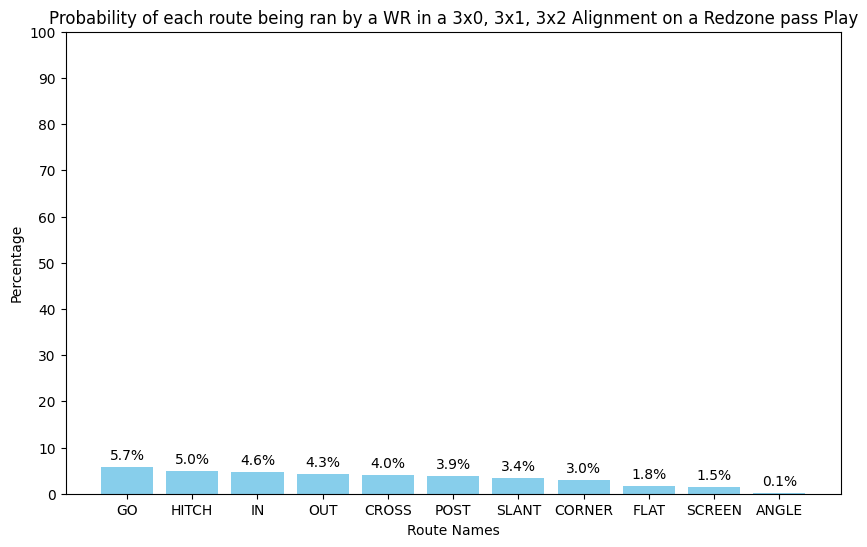

In [3]:
import matplotlib.pyplot as plt

# Updated data for the pie chart
routes = ['GO', 'HITCH', 'IN', 'CROSS', 'OUT', 'POST', 'SLANT', 'CORNER', 'FLAT', 'SCREEN', 'ANGLE']
percentages = [22.877784, 15.291993, 12.703191, 11.077664, 9.512342, 8.127634, 7.826610, 5.779651, 3.913305, 2.769416, 0.120409]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=[f'{route} ({percentage:.1f}%)' for route, percentage in zip(routes, percentages)], 
       autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Set chart title
ax.set_title("Distribution of Routes Run by WRs in 3x0, 3x1, 3x2 Alignment on Redzone pass plays")

# Display the chart
plt.show()



routes = [
    'GO', 'HITCH', 'IN', 'OUT', 'CROSS', 'POST', 
    'SLANT', 'CORNER', 'FLAT', 'SCREEN', 'ANGLE'
]
percentages = [
    5.679012, 4.979424, 4.609053, 4.320988, 
    3.950617, 3.909465, 3.374486, 2.962963, 
    1.769547, 1.522634, 0.082305
]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(routes, percentages, color='skyblue')

# Set chart title and labels
plt.title('Probability of each route being ran by a WR in a 3x0, 3x1, 3x2 Alignment on a Redzone pass Play')
plt.xlabel('Route Names')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.yticks(range(0, 101, 10))  # Set y-axis ticks every 10 percent

# Add percentage values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 1,  # Position above the bar
        f'{yval:.1f}%',  # Format to one decimal place
        ha='center', va='bottom'
    )

# Show the chart
plt.show()

In [4]:
 #Combine PlayerPlay and Play datasets
CombinedData = pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combine The other datasets with PlayerInfo Dataset
CombinedData= pd.merge(CombinedData,PlayerInfo, on='nflId', how='inner')
#filter out for plays that meet the conditions
CombinedData = CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20) & (CombinedData['receiverAlignment'].isin(['3x0', '3x1', '3x2'])) & 
(CombinedData['isDropback'] == True) & (CombinedData['position'] == 'WR')]
# Count how many times each route was ran 
Count_Routes = CombinedData['routeRan'].value_counts()
# Total number of routes
Total_Routes = Count_Routes.sum()
# Formula to calculate route percentages
Route_Percentages = (Count_Routes / Total_Routes) * 100
#show route percentages
print(Route_Percentages,Count_Routes)


routeRan
GO        22.877784
HITCH     15.291993
IN        12.703191
CROSS     11.077664
OUT        9.512342
POST       8.127634
SLANT      7.826610
CORNER     5.779651
FLAT       3.913305
SCREEN     2.769416
ANGLE      0.120409
Name: count, dtype: float64 routeRan
GO        380
HITCH     254
IN        211
CROSS     184
OUT       158
POST      135
SLANT     130
CORNER     96
FLAT       65
SCREEN     46
ANGLE       2
Name: count, dtype: int64


In [5]:
# Combine PlayerPlay dataset with the filtered Play dataset
CombinedData = pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combine PlayerInfo dataset with others
CombinedData= pd.merge(CombinedData,PlayerInfo, on='nflId', how='inner')
#filter out for plays that meet the conditions
CombinedData = CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20) & 
(CombinedData['receiverAlignment'].isin(['3x0', '3x1', '3x2'])) & (CombinedData['isDropback'] == True) & (CombinedData['position'] == 'WR')]
# Drop duplicate routes within each play
UniqueRoutes_PerPlay = CombinedData[['playId', 'routeRan']].drop_duplicates()
# Count each route once everytime it appeared in a play
Route_Appearance_Count = UniqueRoutes_PerPlay['routeRan'].value_counts()
# Total number of plays that meet the requirements
Total_Plays = len(CombinedData)
# Calculate the probability of each route appearing in a play
Route_Probabilities = (Route_Appearance_Count / Total_Plays)*100
# Show the probabilities of each route appearing
print('Route appearnce %')
print(Route_Probabilities)
print('Route appearnce count')
print(Route_Appearance_Count)

Route appearnce %
routeRan
GO        5.679012
HITCH     4.979424
IN        4.609053
OUT       4.320988
CROSS     3.950617
POST      3.909465
SLANT     3.374486
CORNER    2.962963
FLAT      1.769547
SCREEN    1.522634
ANGLE     0.082305
Name: count, dtype: float64
Route appearnce count
routeRan
GO        138
HITCH     121
IN        112
OUT       105
CROSS      96
POST       95
SLANT      82
CORNER     72
FLAT       43
SCREEN     37
ANGLE       2
Name: count, dtype: int64


The "Route Target Distrubution in a 3x0, 3x1, 3x2 Alignment on a Redzone pass Play" chart below represents the distribution of passing targets across all games. The pie chart visualizes these percentages, providing a clear comparison of how frequently each route is targeted in the passing game. From the chart, it is evident that the "CROSS" route is the most frequently targeted at 14.2%, followed closely by the "GO" route at 13.9% and the "OUT" route at 13.4%. The "HITCH" and "IN" routes also have significant target shares, at 12.5% and 11.0%, respectively. Conversely, the "ANGLE" route is the least targeted, with only 0.3% of the passes aimed in that direction. This distribution suggests that certain routes, like "CROSS" and "GO," are favored in passing strategies, possibly due to their effectiveness in gaining yardage or fitting particular play designs. The visualization helps in understanding the strategic preferences for route selection during passing plays.

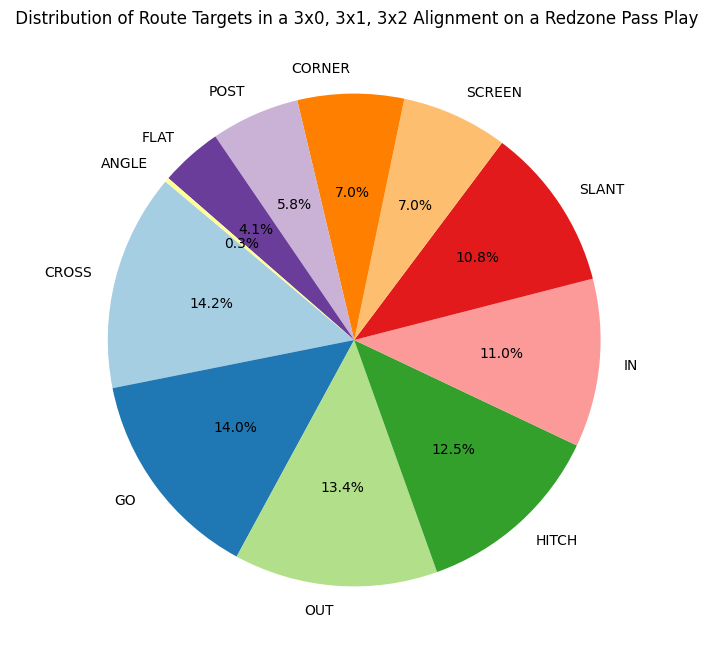

In [6]:
# Data
routes = [
    'CROSS', 'GO', 'OUT', 'HITCH', 'IN', 'SLANT', 
    'SCREEN', 'CORNER', 'POST', 'FLAT', 'ANGLE'
]
percentages = [
    14.244186, 13.953488, 13.372093, 12.500000, 11.046512,
    10.755814, 6.976744, 6.976744, 5.813953, 4.069767, 0.290698
]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=routes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Set chart title
plt.title(' Distribution of Route Targets in a 3x0, 3x1, 3x2 Alignment on a Redzone Pass Play')

# Show the chart
plt.show()

In [7]:
# Combine PlayerPlay dataset with the filtered Play dataset
CombinedData = pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combine PlayerInfo dataset with others
CombinedData= pd.merge(CombinedData,PlayerInfo, on='nflId', how='inner')
#filter out for plays that meet the conditions
CombinedData = CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20) & 
(CombinedData['receiverAlignment'].isin(['3x0', '3x1', '3x2'])) & (CombinedData['isDropback'] == True) & (CombinedData['position'] == 'WR') & (CombinedData['wasTargettedReceiver']== 1)]
# # Count each route everytime it was targeted
Count_Routes= CombinedData['routeRan'].value_counts()
# Count all targeted routes together
Total_Routes=Count_Routes.sum()
# get route target percentages
Target_Percentages=(Count_Routes/Total_Routes)*100
#show route Target Percentages
print("Route Target percentages")
print(Target_Percentages)
print("Route Target Count")
print(Count_Routes)

Route Target percentages
routeRan
CROSS     14.244186
GO        13.953488
OUT       13.372093
HITCH     12.500000
IN        11.046512
SLANT     10.755814
SCREEN     6.976744
CORNER     6.976744
POST       5.813953
FLAT       4.069767
ANGLE      0.290698
Name: count, dtype: float64
Route Target Count
routeRan
CROSS     49
GO        48
OUT       46
HITCH     43
IN        38
SLANT     37
SCREEN    24
CORNER    24
POST      20
FLAT      14
ANGLE      1
Name: count, dtype: int64


The bar chart below represents the probabilities of different routes being targeted during passing plays in Redzone across all games , with percentages indicating the likelihood of each route being chosen. The bar chart visually demonstrates these probabilities, highlighting that the 'CROSS' route has the highest probability (2.02%), followed closely by the 'GO' and 'OUT' routes. The chart shows that the 'ANGLE' route is the least targeted, with a significantly lower probability (0.04%). Overall, the chart provides insight into the preference for certain routes in passing strategies, indicating a higher reliance on routes like 'CROSS' and 'GO'.

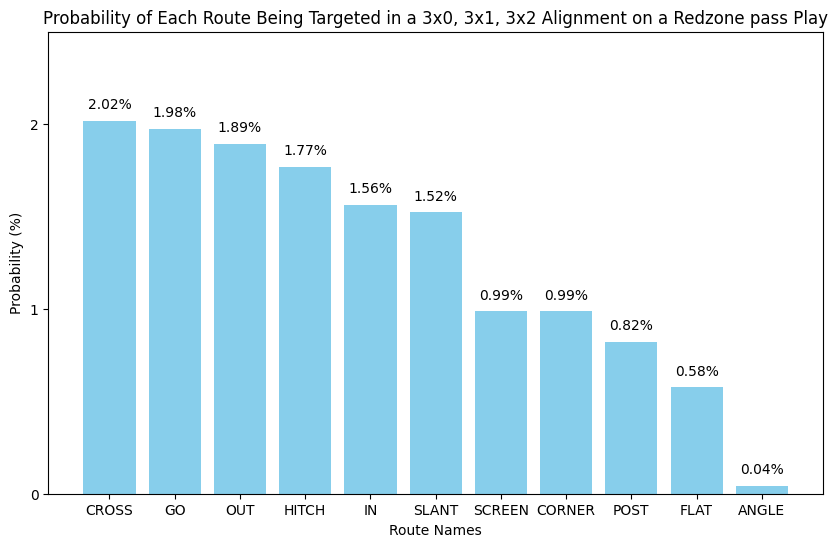

In [8]:
import matplotlib.pyplot as plt

# Data
routes = [
    'CROSS', 'GO', 'OUT', 'HITCH', 'IN', 
    'SLANT', 'SCREEN', 'CORNER', 'POST', 'FLAT', 'ANGLE'
]
probabilities = [
    2.016461, 1.975309, 1.893004, 1.769547, 1.563786, 
    1.522634, 0.987654, 0.987654, 0.823045, 0.576132, 0.041152
]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(routes, probabilities, color='skyblue')

# Set chart title and labels
plt.title('Probability of Each Route Being Targeted in a 3x0, 3x1, 3x2 Alignment on a Redzone pass Play')
plt.xlabel('Route Names')
plt.ylabel('Probability (%)')
plt.ylim(0, 2.5)  # Set y-axis limit for better visualization
plt.yticks(range(0, 3, 1))  # Set y-axis ticks

# Add probability values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval + 0.05,  # Position above the bar
        f'{yval:.2f}%',  # Format to two decimal places
        ha='center', va='bottom'
    )

# Show the chart
plt.show()

In [9]:
# Combine PlayerPlay dataset with the filtered Play dataset
CombinedData = pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combine PlayerInfo dataset with others
CombinedData= pd.merge(CombinedData,PlayerInfo, on='nflId', how='inner')
#filter out for plays that meet the conditions
CombinedData = CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20) & 
(CombinedData['receiverAlignment'].isin(['3x0', '3x1', '3x2'])) & (CombinedData['isDropback'] == True) & (CombinedData['position'] == 'WR')]
# Calculate the targeted occurrences for each route
Targeted_Route_Count = CombinedData[CombinedData['wasTargettedReceiver'] == 1]['routeRan'].value_counts()
# Calculate the probability of each route being targeted in all plays
Route_Probability = (Targeted_Route_Count / len(CombinedData)) * 100
# show route target the probabilities
print("Probability of Each Route Being Targeted %")
print(Route_Probability)
print("Route Target count")
print(Targeted_Route_Count)

Probability of Each Route Being Targeted %
routeRan
CROSS     2.016461
GO        1.975309
OUT       1.893004
HITCH     1.769547
IN        1.563786
SLANT     1.522634
SCREEN    0.987654
CORNER    0.987654
POST      0.823045
FLAT      0.576132
ANGLE     0.041152
Name: count, dtype: float64
Route Target count
routeRan
CROSS     49
GO        48
OUT       46
HITCH     43
IN        38
SLANT     37
SCREEN    24
CORNER    24
POST      20
FLAT      14
ANGLE      1
Name: count, dtype: int64


# '2x0', '2x1', '2x2' Receiver Alignment:


The pie chart below represents the percentage distribution of route targets in '2x0', '2x1', '2x2' Receiver Alignment across all games, providing insight into which routes are most frequently targeted during gameplay. The route "OUT" is the most commonly targeted with 16.73%, closely followed by "HITCH" at 16.37%. This indicates that these routes are central to the offensive strategy, being targeted nearly one-sixth of the time. Other routes, such as "CROSS" and "SLANT," are also frequently targeted, with percentages of 14.95% and 13.88%, respectively. On the other hand, routes like "ANGLE" are targeted far less, accounting for only 1.07% of targets. A bar chart of this data would clearly demonstrate that a small number of routes (OUT, HITCH, CROSS, SLANT, and GO) make up the bulk of the targets, while many others are targeted infrequently. 

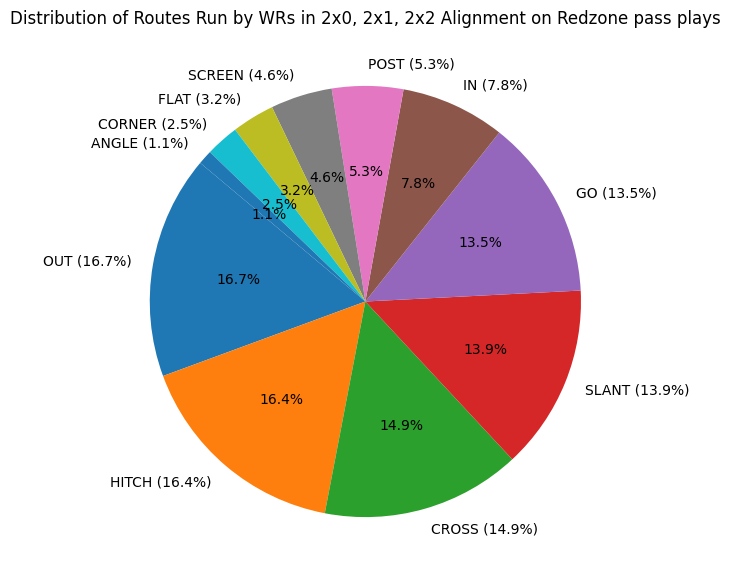

In [10]:
# Data
routes = ['OUT', 'HITCH', 'CROSS', 'SLANT', 'GO', 'IN', 'POST', 'SCREEN', 'FLAT', 'CORNER', 'ANGLE']
percentages = [16.725979, 16.370107, 14.946619, 13.879004, 13.523132, 7.829181, 5.338078, 4.626335, 3.202847, 2.491103, 1.067616]

# Create formatted labels combining route names and percentages
labels = [f'{route} ({percentage:.1f}%)' for route, percentage in zip(routes, percentages)]

# Create the pie chart with both route names and percentages inside each slice
plt.figure(figsize=(10, 7))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)

# Set chart title
plt.title('Distribution of Routes Run by WRs in 2x0, 2x1, 2x2 Alignment on Redzone pass plays')

# Show the chart
plt.show()

In [11]:
# Combine PlayerPlay dataset with the filtered Play dataset
CombinedData = pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combine PlayerInfo dataset with others
CombinedData= pd.merge(CombinedData,PlayerInfo, on='nflId', how='inner')
#filter out for plays that meet the conditions
CombinedData = CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20) & 
(CombinedData['receiverAlignment'].isin(['2x0', '2x1', '2x2'])) & (CombinedData['isDropback'] == True) & (CombinedData['position'] == 'WR') & (CombinedData['wasTargettedReceiver']== 1)]
# # Count each route everytime it was targeted
Count_Routes= CombinedData['routeRan'].value_counts()
# Count all targeted routes together
Total_Routes=Count_Routes.sum()
# get route target percentages
Target_Percentages=(Count_Routes/Total_Routes)*100
#show route Target Percentages
print("Route Target Distrubution")
print(Target_Percentages)
print("Route Target Count")
print(Count_Routes)

Route Target Distrubution
routeRan
OUT       16.725979
HITCH     16.370107
CROSS     14.946619
SLANT     13.879004
GO        13.523132
IN         7.829181
POST       5.338078
SCREEN     4.626335
FLAT       3.202847
CORNER     2.491103
ANGLE      1.067616
Name: count, dtype: float64
Route Target Count
routeRan
OUT       47
HITCH     46
CROSS     42
SLANT     39
GO        38
IN        22
POST      15
SCREEN    13
FLAT       9
CORNER     7
ANGLE      3
Name: count, dtype: int64


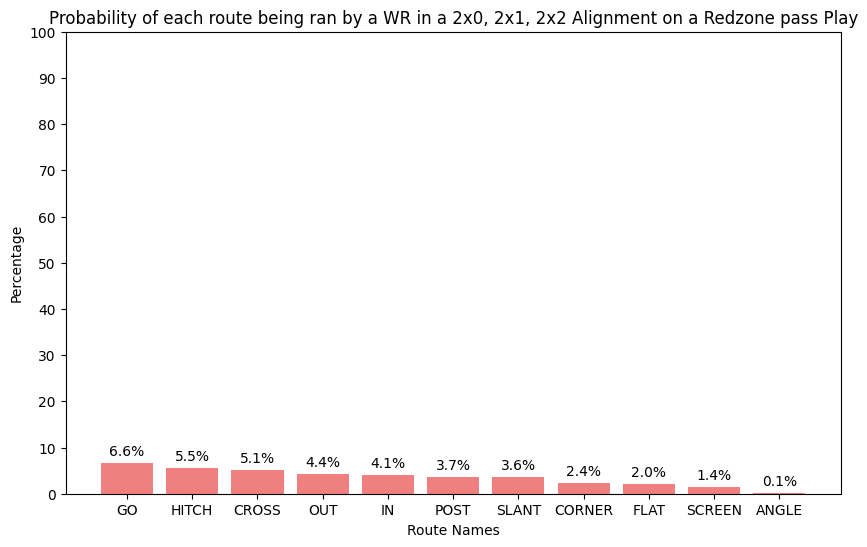

In [12]:
import matplotlib.pyplot as plt

# Data
routes = [
    'GO', 'HITCH', 'CROSS', 'OUT', 'IN', 'POST',
    'SLANT', 'CORNER', 'FLAT', 'SCREEN', 'ANGLE'
]
percentages = [
    6.589492, 5.520926, 5.075690, 4.363313, 4.096171,
    3.650935, 3.561888, 2.359751, 2.048085, 1.380232, 0.133571
]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(routes, percentages, color='lightcoral')

# Set chart title and labels
plt.title('Probability of each route being ran by a WR in a 2x0, 2x1, 2x2 Alignment on a Redzone pass Play')
plt.xlabel('Route Names')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.yticks(range(0, 101, 10))  # Set y-axis ticks every 10 percent

# Add percentage values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 1,  # Position above the bar
        f'{yval:.1f}%',  # Format to one decimal place
        ha='center', va='bottom'
    )

# Show the chart
plt.show()

In [13]:
#Combined datasets
CombinedData= pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combined PlayerInfo dataset with the others
CombinedData=pd.merge(CombinedData, PlayerInfo, on='nflId', how='inner')
#Filter the combined Datasets
CombinedData=CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20)&(CombinedData['receiverAlignment'].isin(['2x2','2x1','2x0'])) & 
(CombinedData['isDropback']==True)& (CombinedData['position'] == 'WR')]
# drop duplicate routes within each play
UniqueRoutes_PerPlay= CombinedData[['playId','routeRan']].drop_duplicates()
#Count each route once everytime it appeared in a play
Route_Appearance= UniqueRoutes_PerPlay['routeRan'].value_counts()
## Total number of plays that meet the requirements
Total_Plays=len(CombinedData)
## Calculate the probability of each route appearing in a play
Route_probabilities= (Route_Appearance/Total_Plays)*100
# Show the probabilities of each route appearing
print("Route apperance probability")
print(Route_probabilities)
print("Route Apperance Count")
print(Route_Appearance)

Route apperance probability
routeRan
GO        6.589492
HITCH     5.520926
CROSS     5.075690
OUT       4.363313
IN        4.096171
POST      3.650935
SLANT     3.561888
CORNER    2.359751
FLAT      2.048085
SCREEN    1.380232
ANGLE     0.133571
Name: count, dtype: float64
Route Apperance Count
routeRan
GO        148
HITCH     124
CROSS     114
OUT        98
IN         92
POST       82
SLANT      80
CORNER     53
FLAT       46
SCREEN     31
ANGLE       3
Name: count, dtype: int64


The bar chart below represents the probability of route appearance in plays across all games, indicating how often each route is chosen relative to others. The route "GO" has the highest probability of appearing at 6.59%, followed by "HITCH" at 5.52%, suggesting that these routes are favored more often in the playcalling. Routes like "CROSS" and "OUT" are also relatively common, with probabilities of 5.08% and 4.36%, respectively. On the lower end, routes such as "SCREEN" and "ANGLE" have much smaller probabilities, at 1.38% and 0.13%, indicating they are rarely called

The bar chart below represents the probability of each route being targeted across all games, providing insight into how frequently different routes are called during gameplay. The "OUT" route has the highest probability of being targeted at 2.09%, followed closely by "HITCH" at 2.05%, indicating these routes are the most commonly selected. Other routes like "CROSS" and "SLANT" also have notable probabilities at 1.87% and 1.74%, respectively. On the lower end, routes such as "ANGLE" and "CORNER" are much less likely to be targeted, with probabilities of just 0.13% and 0.31%.

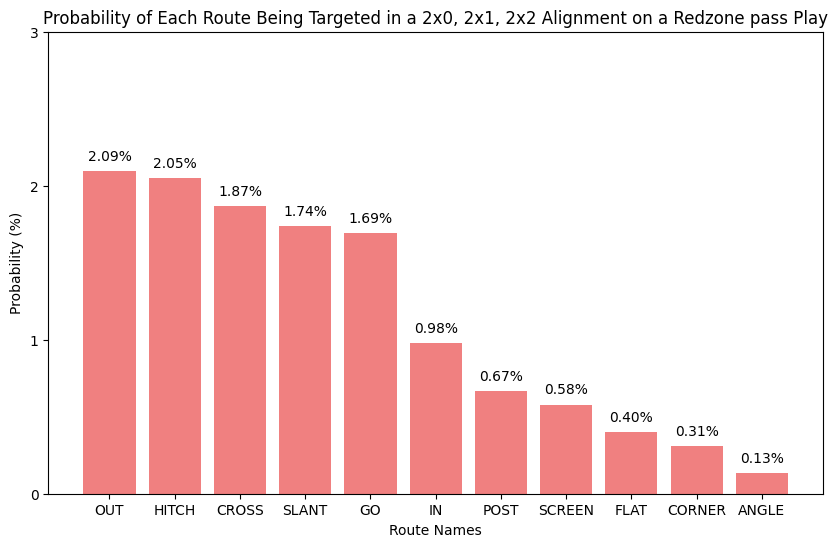

In [14]:
# Data
routes = [
    'OUT', 'HITCH', 'CROSS', 'SLANT', 'GO', 'IN', 
    'POST', 'SCREEN', 'FLAT', 'CORNER', 'ANGLE'
]
probabilities = [
    2.092609, 2.048085, 1.869991, 1.736420, 1.691897,
    0.979519, 0.667854, 0.578807, 0.400712, 0.311665, 0.133571
]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(routes, probabilities, color='lightcoral')

# Set chart title and labels
plt.title('Probability of Each Route Being Targeted in a 2x0, 2x1, 2x2 Alignment on a Redzone pass Play')
plt.xlabel('Route Names')
plt.ylabel('Probability (%)')
plt.ylim(0, 3)  # Set y-axis limit based on the data
plt.yticks(range(0, 4, 1))  # Set y-axis ticks every 1 percent

# Add probability values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.05,  # Position above the bar
        f'{yval:.2f}%',  # Format to two decimal places
        ha='center', va='bottom'
    )

# Show the chart
plt.show()

In [15]:
# Combine PlayerPlay dataset with the filtered Play dataset
CombinedData = pd.merge(Play, PlayerPlay, on='playId', how='inner')
#Combine PlayerInfo dataset with others
CombinedData= pd.merge(CombinedData,PlayerInfo, on='nflId', how='inner')
#filter out for plays that meet the conditions
CombinedData = CombinedData[(CombinedData['absoluteYardlineNumber'] <= 20) & 
(CombinedData['receiverAlignment'].isin(['2x0', '2x1', '2x2'])) & (CombinedData['isDropback'] == True) & (CombinedData['position'] == 'WR')]
# Calculate the targeted occurrences for each route
Targeted_Route_Count = CombinedData[CombinedData['wasTargettedReceiver'] == 1]['routeRan'].value_counts()
# Calculate the probability of each route being targeted in all plays
Route_Probability = (Targeted_Route_Count / len(CombinedData)) * 100
# show route target the probabilities
print("Probability of Each Route Being Targeted %")
print(Route_Probability)
print("Route Target count")
print(Targeted_Route_Count)

Probability of Each Route Being Targeted %
routeRan
OUT       2.092609
HITCH     2.048085
CROSS     1.869991
SLANT     1.736420
GO        1.691897
IN        0.979519
POST      0.667854
SCREEN    0.578807
FLAT      0.400712
CORNER    0.311665
ANGLE     0.133571
Name: count, dtype: float64
Route Target count
routeRan
OUT       47
HITCH     46
CROSS     42
SLANT     39
GO        38
IN        22
POST      15
SCREEN    13
FLAT       9
CORNER     7
ANGLE      3
Name: count, dtype: int64


# Blitzing players coordinates in the redzone. Week 9:

The visual below represents the positions and coordinates (x, y) of players on the field who were initial pass rushers and successfully caused pressure on the quarterback during plays in the Redzone during week 9. The positions included are "ILB" (Inside Linebacker), "CB" (Cornerback), "SS" (Strong Safety), and "FS" (Free Safety). The coordinates provide the location of each player before the snap.

it is evident that "ILB" is the most frequently represented position, suggesting that inside linebackers are often utilized as initial pass rushers in these scenarios. This is followed by the presence of cornerbacks and safeties, both strong and free, indicating that these secondary positions are also involved in pressuring the quarterback.

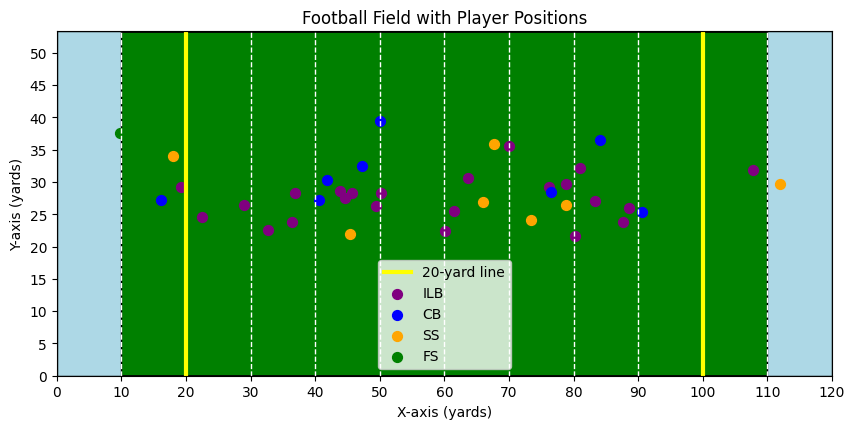

In [16]:

# Example data from your input
data = {
    'x': [87.70, 84.16, 45.74, 45.37, 63.59, 9.77, 83.28, 80.99, 107.82, 88.55, 69.93, 60.06, 50.19, 43.84, 22.50, 47.23, 73.48, 48.98, 19.15, 78.89, 76.26, 78.86, 49.47, 80.26, 80.93, 36.91, 29.04, 65.90, 60.74, 90.55, 111.91, 32.62, 50.02, 78.90, 67.64, 36.33, 61.49, 41.83, 40.53, 44.56, 16.10, 17.90, 76.53],
    'y': [23.75, 36.47, 28.22, 21.89, 30.66, 37.55, 27.02, 32.20, 31.86, 25.90, 35.50, 22.43, 28.33, 28.58, 24.55, 32.47, 24.06, 26.58, 29.27, 30.48, 29.23, 29.67, 26.32, 21.59, 25.44, 28.29, 26.37, 26.97, 29.13, 25.28, 29.63, 22.56, 39.43, 26.42, 35.84, 23.81, 25.54, 30.31, 27.14, 27.45, 27.25, 34.01, 28.42],
    'position': ['ILB', 'CB', 'ILB', 'SS', 'ILB', 'FS', 'ILB', 'ILB', 'ILB', 'ILB', 'ILB', 'ILB', 'ILB', 'ILB', 'ILB', 'CB', 'SS', 'FS', 'ILB', 'FS', 'ILB', 'ILB', 'ILB', 'ILB', 'FS', 'ILB', 'ILB', 'SS', 'FS', 'CB', 'SS', 'ILB', 'CB', 'SS', 'SS', 'ILB', 'ILB', 'CB', 'CB', 'ILB', 'CB', 'SS', 'CB']
}
# Convert to DataFrame
df = pd.DataFrame(data)
# Field dimensions
field_length = 120
field_width = 53.3
# Color mapping for positions
color_mapping = {'CB': 'blue', 'ILB': 'purple', 'FS': 'green', 'SS': 'orange'}
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Draw the field outline
field_outline = patches.Rectangle((0, 0), field_length, field_width, linewidth=2, edgecolor='black', facecolor='green')
ax.add_patch(field_outline)
# Add end zones
end_zone_left = patches.Rectangle((0, 0), 10, field_width, linewidth=1, edgecolor='black', facecolor='lightblue')
end_zone_right = patches.Rectangle((110, 0), 10, field_width, linewidth=1, edgecolor='black', facecolor='lightblue')
ax.add_patch(end_zone_left)
ax.add_patch(end_zone_right)
# Add 10-yard lines
for x in range(10, 120, 10):
    ax.plot([x, x], [0, field_width], color='white', linestyle='--', linewidth=1)
# Highlight 20-yard lines
ax.plot([20, 20], [0, field_width], color='yellow', linestyle='-', linewidth=3, label='20-yard line')
ax.plot([100, 100], [0, field_width], color='yellow', linestyle='-', linewidth=3)
# Plot the player positions
for _, row in df.iterrows():
    ax.scatter(row['x'], row['y'], color=color_mapping[row['position']], label=row['position'], s=50)
# Avoid duplicate legends
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
# Set axis limits and labels
ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)
ax.set_aspect('equal')
ax.set_xticks(range(0, 121, 10))
ax.set_yticks(range(0, 54, 5))
ax.set_xticklabels(range(0, 121, 10))
ax.set_yticklabels(range(0, 54, 5))
ax.grid(False)
# Add labels
ax.set_title("Football Field with Player Positions")
ax.set_xlabel("X-axis (yards)")
ax.set_ylabel("Y-axis (yards)")

# Show the plot
plt.show()


In [17]:
Play2 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv', usecols=['gameId', 'absoluteYardlineNumber','playDescription'])
PlayerPlay2 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv', usecols=['gameId','nflId','playId','wasInitialPassRusher','causedPressure']  )
PlayerInfo2= pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/players.csv', usecols=['nflId','position'] ) 
TrackdataWeek9=pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv',  usecols=['nflId','playId','gameId','x','y','displayName','frameType','playDirection'])

PlayerPlay2=PlayerPlay2[(PlayerPlay2['causedPressure']==True)& PlayerPlay2['wasInitialPassRusher']==1]
PlayerInfo2=PlayerInfo2[PlayerInfo2['position'].isin(['SS','CB','FS','ILB',])]
Play2=Play2[Play2['absoluteYardlineNumber'] <=20]
TrackdataWeek9 = TrackdataWeek9[(TrackdataWeek9['frameType'] == 'BEFORE_SNAP') ]

# Grouping with gameId
TrackdataWeek9 = TrackdataWeek9.groupby(['nflId', 'gameId', 'playId']).first().reset_index()

# Merge operations
CombinedData = pd.merge(PlayerPlay2, TrackdataWeek9, on=['nflId', 'gameId', 'playId'], how='inner')
CombinedData = pd.merge(CombinedData, PlayerInfo2, on='nflId', how='inner')
CombinedData = pd.merge(CombinedData, Play2, on='gameId', how='inner')

# Remove duplicates if necessary
CombinedData = CombinedData.drop_duplicates(subset=['nflId', 'gameId', 'playId'])
BlitzCount= CombinedData['position'].value_counts()
#print(len(CombinedData))
print(CombinedData[['x','y','position']])
print('Blitz count for each position')
print(BlitzCount)

          x      y position
0     87.70  23.75      ILB
6     84.16  36.47       CB
12    45.74  28.22      ILB
19    45.37  21.89       SS
26    63.59  30.66      ILB
33    80.99  32.20      ILB
40     9.77  37.55       FS
47    83.28  27.02      ILB
54   107.82  31.86      ILB
61    88.55  25.90      ILB
62    69.93  35.50      ILB
68    60.06  22.43      ILB
74    50.19  28.33      ILB
81    43.84  28.58      ILB
88    22.50  24.55      ILB
96    19.15  29.27      ILB
104   47.23  32.47       CB
112   73.48  24.06       SS
120   48.98  26.58       FS
128   78.89  30.48       FS
136   76.26  29.23      ILB
144   78.86  29.67      ILB
153   49.47  26.32      ILB
162   80.26  21.59      ILB
171   80.93  25.44       FS
180   36.91  28.29      ILB
189   29.04  26.37      ILB
198   65.90  26.97       SS
207   60.74  29.13       FS
209   90.55  25.28       CB
211  111.91  29.63       SS
213   32.62  22.56      ILB
214   50.02  39.43       CB
215   78.90  26.42       SS
216   67.64  35.84  